In [22]:
import matplotlib.pyplot as plt
import numpy as np
import qutip as qt
import time

import gc
import sys

sys.path.append(r"E:\Research\Projects\Triangle Lattice\chiral_currents_project\Jupyter Notebooks\8Q_Triangle_Lattice_v1")

import importlib
import current_measurements.src.src_current_measurement_simulations
importlib.reload(current_measurements.src.src_current_measurement_simulations)

from current_measurements.src.src_current_measurement_simulations import CurrentMeasurementSimulation, generate_triangle_lattice_Hamiltonian


In [23]:
def add_phase(current_measurement_simulation, pair_1, pair_2, angles, print_logs=False):

    psi0 = current_measurement_simulation.psi0
    number_operators = current_measurement_simulation.number_operators

    z_1 = (number_operators[pair_1[0]] - number_operators[pair_1[1]])
    z_2 = (number_operators[pair_2[0]] - number_operators[pair_2[1]])

    unitary = (1j*(angles[0]*z_1/2 + angles[1]*z_2/2)).expm()

    if psi0.isoper:
        if print_logs:
            print('density matrix')
        psi0 = unitary @ psi0 * unitary.dag()
    elif psi0.isket:
        if print_logs:
            print('state vector')
        psi0 = unitary @ psi0

    current_measurement_simulation.psi0 = psi0
        

In [24]:
def add_x_rotation(current_measurement_simulation, pair_1, pair_2, angles, print_logs=False):

    psi0 = current_measurement_simulation.psi0
    annihilation_operators = current_measurement_simulation.annihilation_operators

    a1 = annihilation_operators[pair_1[0]]
    a2 = annihilation_operators[pair_1[1]]
    a3 = annihilation_operators[pair_2[0]]
    a4 = annihilation_operators[pair_2[1]]

    x_1 = (a1.dag()*a2 + a2.dag()*a1)
    x_2 = (a3.dag()*a4 + a4.dag()*a3)


    unitary = (1j*(angles[0]*x_1/2 + angles[1]*x_2/2)).expm()

    if psi0.isoper:
        if print_logs:
            print('density matrix')
        psi0 = unitary @ psi0 * unitary.dag()
    elif psi0.isket:
        if print_logs:
            print('state vector')
        psi0 = unitary @ psi0

    current_measurement_simulation.psi0 = psi0
        

In [20]:
num_levels = 2
num_qubits = 4
num_particles = 2

J = 6 * 2 * np.pi
J_parallel = -6*2*np.pi

U = -180 * 2 * np.pi

measurement_detunings = np.array([300, 300, -200, -200])*2*np.pi

times = np.linspace(0, 0.2, 101)

readout_pair_1 = [0, 1]
readout_pair_2 = [2, 3]

initial_detunings = np.array([0, 0, 0, 0])*2*np.pi

psi0 = -1

current_measurement_simulation = CurrentMeasurementSimulation(num_levels, num_qubits, num_particles, J, J_parallel, U, times, readout_pair_1, readout_pair_2,
                                                              initial_detunings=None, psi0=psi0, print_logs=True)




phase_angles = [0, 0]
add_phase(current_measurement_simulation, readout_pair_1, readout_pair_2, phase_angles)

x_angles = [0, 0]
add_x_rotation(current_measurement_simulation, readout_pair_1, readout_pair_2, x_angles)

current_measurement_simulation.run_simulation(True)


psi0 dims: [[2, 2, 2, 2], [1]]
psi0 is a state vector
running simulation
running sesolve


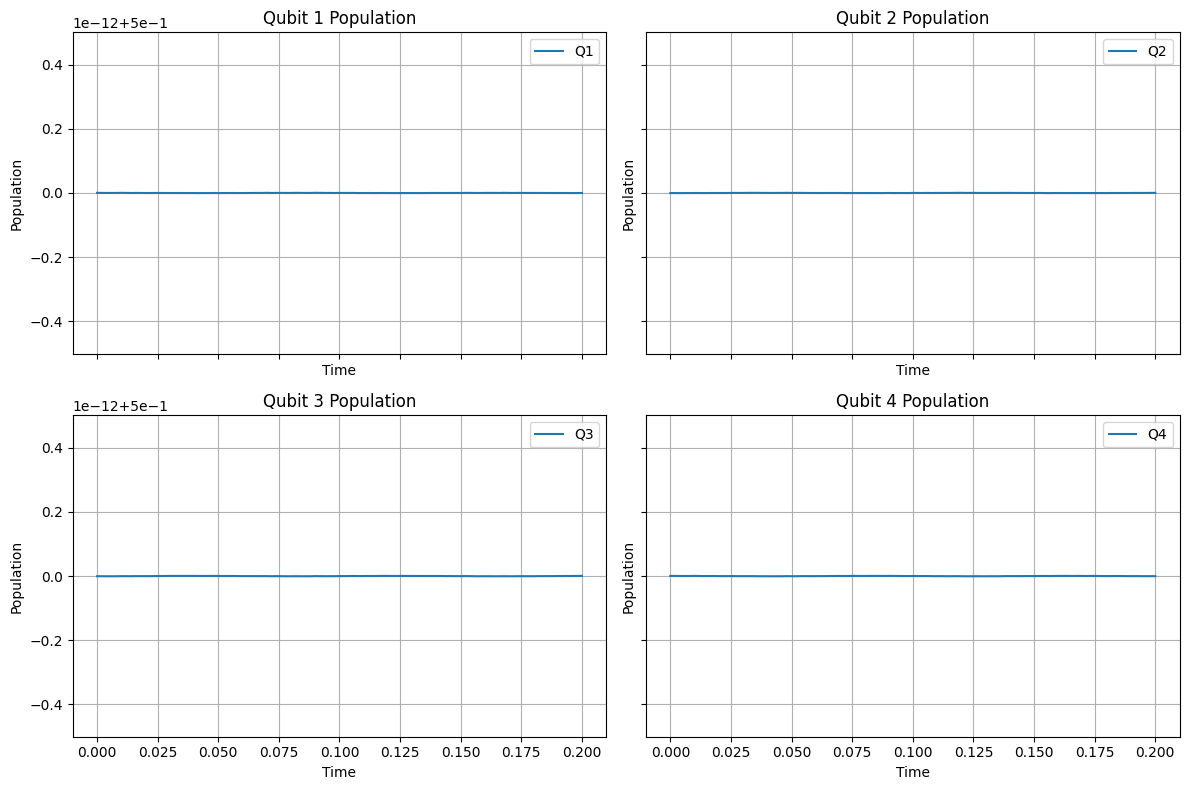

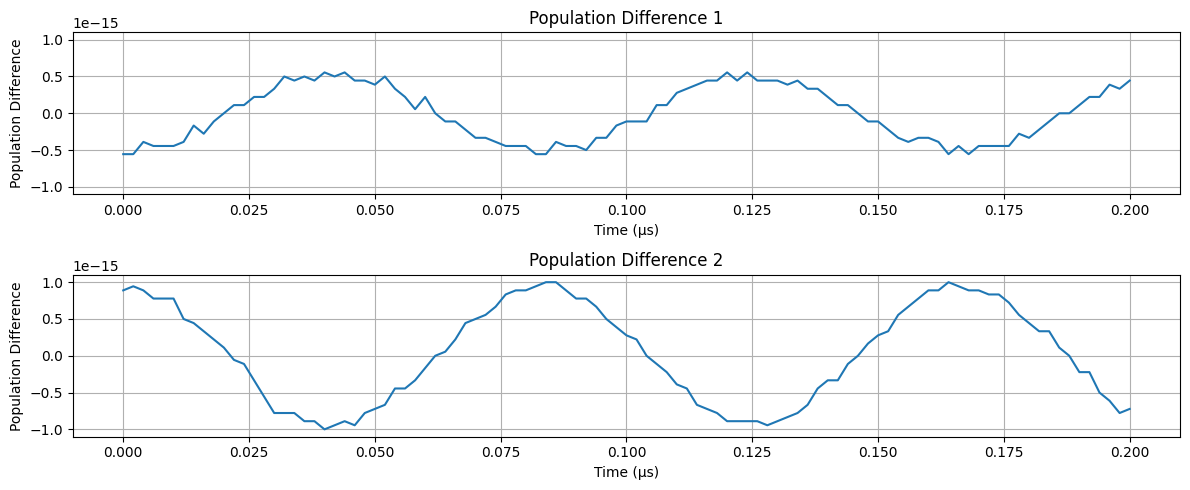

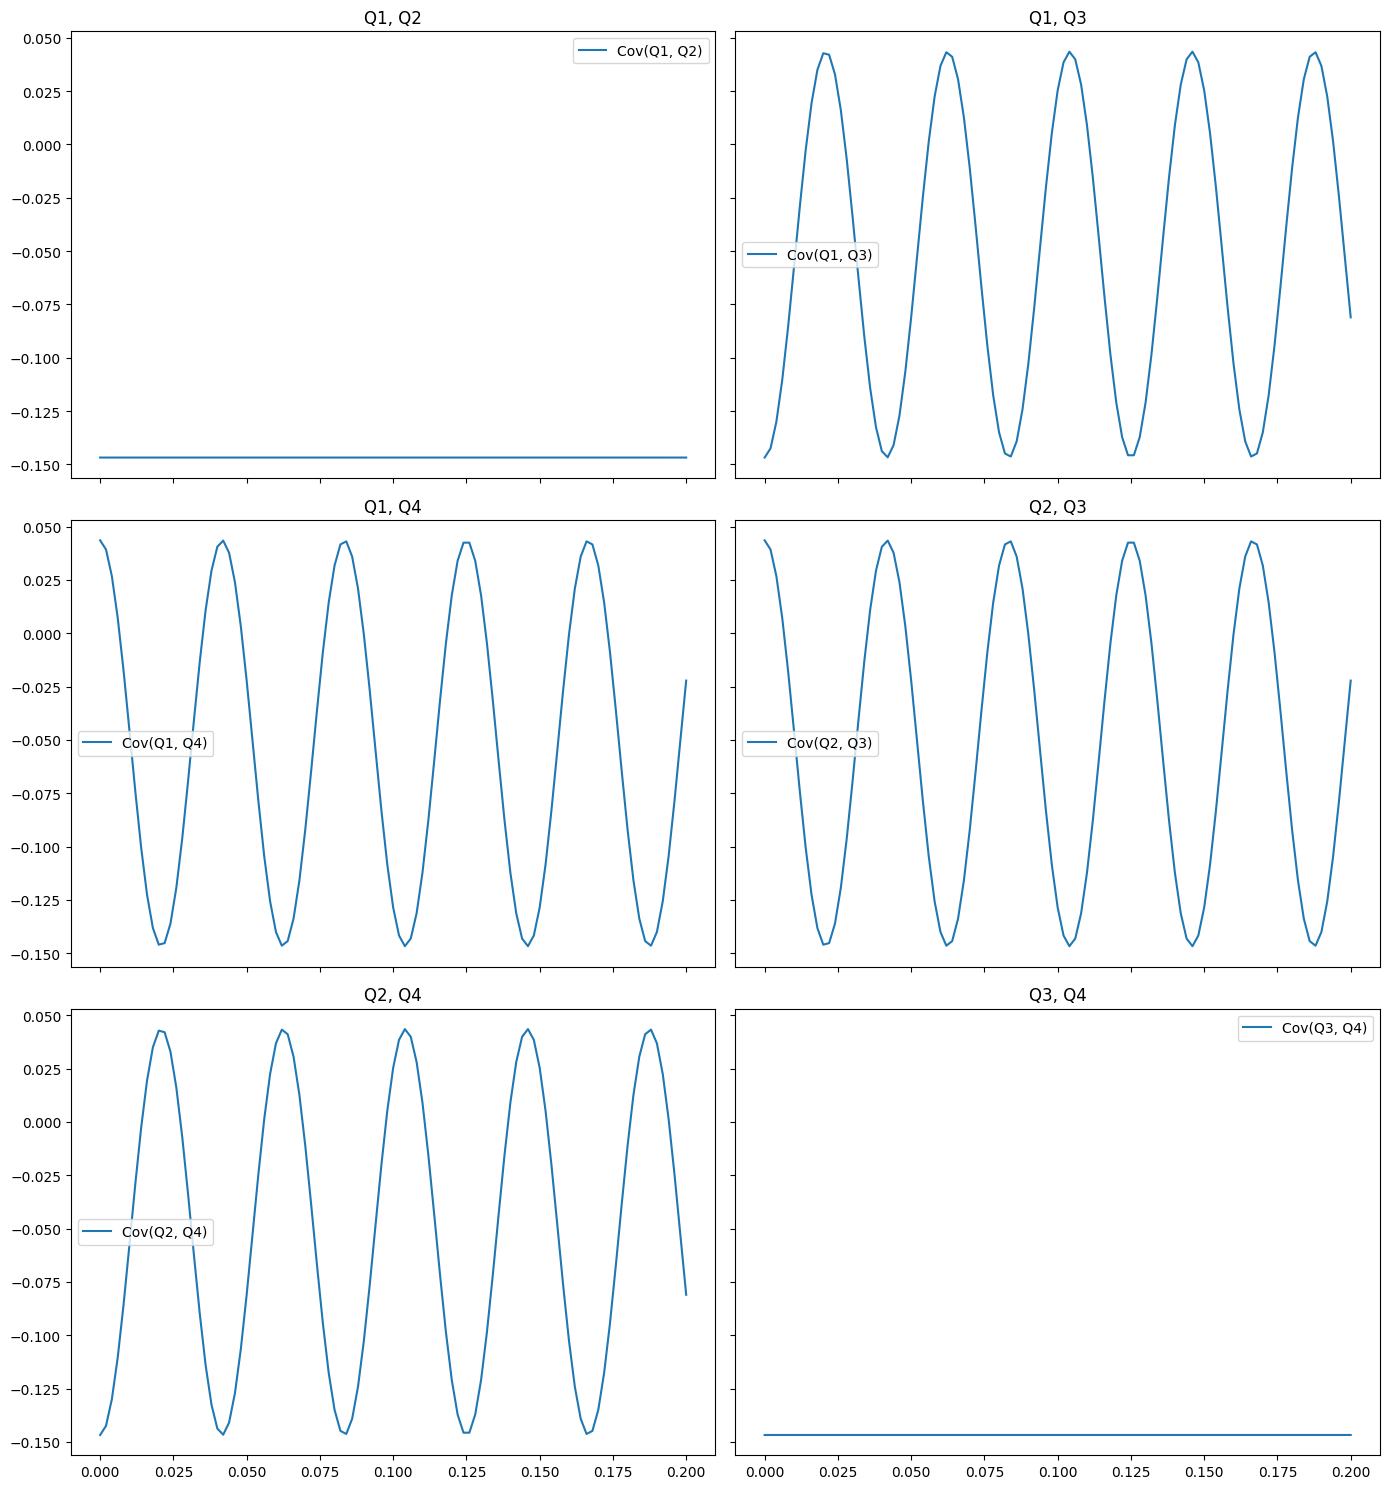

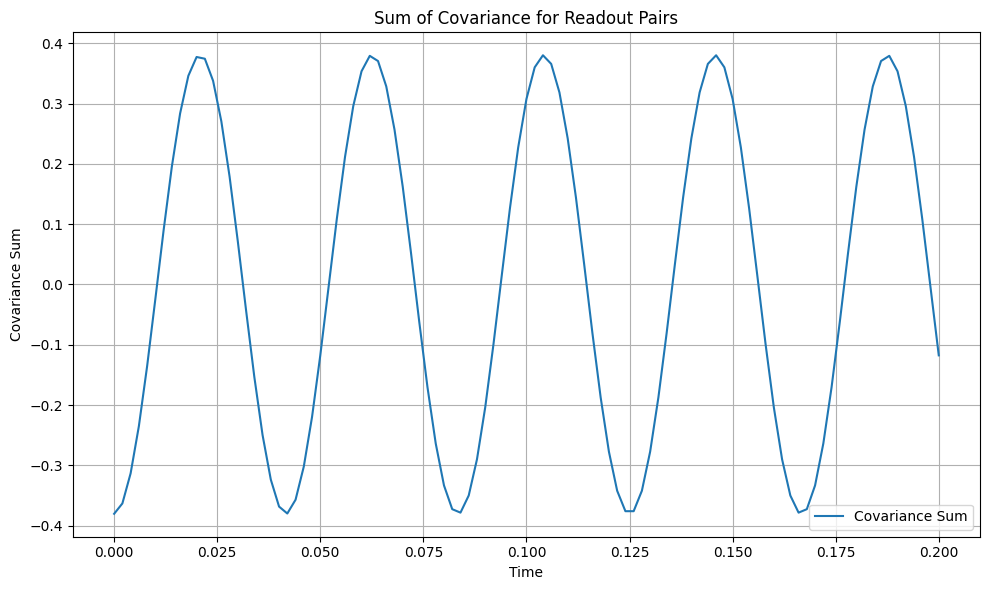

In [21]:
current_measurement_simulation.plot_populations()
current_measurement_simulation.plot_population_difference()
current_measurement_simulation.plot_covariance()
current_measurement_simulation.plot_covariance_sum()


### 1.1 Sweep Phase

In [237]:
num_levels = 2
num_qubits = 4
num_particles = 2

J = 6 * 2 * np.pi
J_parallel = -6*2*np.pi

U = -180 * 2 * np.pi

measurement_detunings = np.array([300, 300, -200, -200])*2*np.pi

times = np.linspace(0, 0.2, 501)

readout_pair_1 = [0, 1]
readout_pair_2 = [2, 3]

initial_detunings = np.array([0, 0, 0, 0])*2*np.pi

psi0 = -1


phases = np.linspace(0, 2*np.pi, 101)
phase_2 = 0

x_angles = [np.pi/2, 0]

correlation_data = np.zeros((len(phases), len(times)))

for i in range(len(phases)):

    # print(f'i: {i}, phase: {phases[i]:.2f}')

    
    current_measurement_simulation = CurrentMeasurementSimulation(num_levels, num_qubits, num_particles, J, J_parallel, U, times, readout_pair_1, readout_pair_2,
                                                              initial_detunings=None, psi0=psi0)


    phase_angles = [phases[i], phase_2]
    add_phase(current_measurement_simulation, readout_pair_1, readout_pair_2, phase_angles)

    add_x_rotation(current_measurement_simulation, readout_pair_1, readout_pair_2, x_angles)

    current_measurement_simulation.run_simulation(True)

    correlation_data[i,:] = current_measurement_simulation.get_covariance_sum()



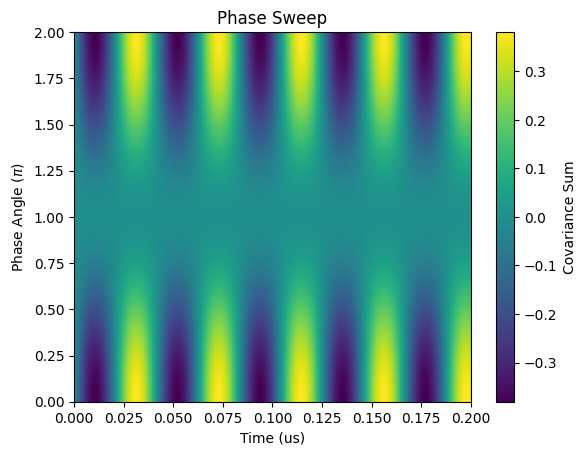

In [238]:
plt.imshow(correlation_data, interpolation='none',
           extent=(times[0], times[-1], phases[0]/np.pi, phases[-1]/np.pi), aspect='auto', origin='lower')
plt.colorbar(label='Covariance Sum')
plt.xlabel('Time (us)')
plt.ylabel(r'Phase Angle ($\pi$)')
plt.title('Phase Sweep')
plt.show()

### 1.2 Sweep X rotation

In [230]:
import psutil, os

process = psutil.Process(os.getpid())

num_levels = 2
num_qubits = 4
num_particles = 2

J = 6 * 2 * np.pi

J = [J, J, J]

J_parallel = -6*2*np.pi

U = -180 * 2 * np.pi

measurement_detunings = np.array([300, 300, -200, -200])*2*np.pi

times = np.linspace(0, 0.2, 101)

readout_pair_1 = [0, 1]
readout_pair_2 = [2, 3]

initial_detunings = np.array([0, 0, 0, 0])*2*np.pi

psi0 = -1

# phase_angles = [np.pi, np.pi]
phase_angles = [0, 0]
phase_angles = [np.pi/2, 0]

x_angles = np.linspace(0, 2*np.pi, 18)
x_angles_2 = 0

correlation_data = np.zeros((len(x_angles), len(times)))

for i in range(len(x_angles)):

    print(f'iteration: {i}')
    print(x_angles[i])


    
    current_measurement_simulation = CurrentMeasurementSimulation(num_levels, num_qubits, num_particles, J, J_parallel, U, times, readout_pair_1, readout_pair_2,
                                                              initial_detunings=None, psi0=psi0)

    print('adding phase')

    add_phase(current_measurement_simulation, readout_pair_1, readout_pair_2, phase_angles)
    print('adding x rotation')
    
    rotation_angles = [x_angles[i], x_angles_2]
    # rotation_angles = [x_angles_2, x_angles[i]]

    add_x_rotation(current_measurement_simulation, readout_pair_1, readout_pair_2, rotation_angles)

    current_measurement_simulation.run_simulation(True)

    correlation_data[i,:] = current_measurement_simulation.get_covariance_sum()

    # print(correlation_data[i,:])

    # print(f"Iteration {i}, memory = {process.memory_info().rss/1e6:.1f} MB")



iteration: 0
0.0
adding phase
adding x rotation
iteration: 1
0.36959913571644626
adding phase
adding x rotation
iteration: 2
0.7391982714328925
adding phase
adding x rotation
iteration: 3
1.1087974071493387
adding phase
adding x rotation
iteration: 4
1.478396542865785
adding phase
adding x rotation
iteration: 5
1.8479956785822313
adding phase
adding x rotation
iteration: 6
2.2175948142986774
adding phase
adding x rotation
iteration: 7
2.587193950015124
adding phase
adding x rotation
iteration: 8
2.95679308573157
adding phase
adding x rotation
iteration: 9
3.326392221448016
adding phase
adding x rotation
iteration: 10
3.6959913571644627
adding phase
adding x rotation
iteration: 11
4.065590492880909
adding phase
adding x rotation
iteration: 12
4.435189628597355
adding phase
adding x rotation
iteration: 13
4.804788764313801
adding phase
adding x rotation
iteration: 14
5.174387900030248
adding phase
adding x rotation
iteration: 15
5.543987035746694
adding phase
adding x rotation
iteration:

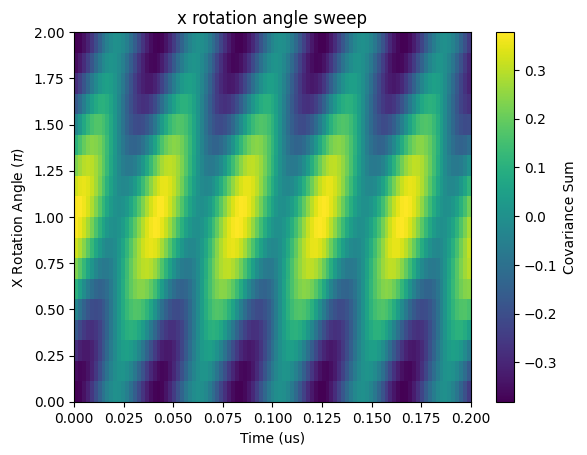

In [231]:
plt.imshow(correlation_data, interpolation='none',
           extent=(times[0], times[-1], x_angles[0]/np.pi, x_angles[-1]/np.pi), aspect='auto', origin='lower')

# plt.axvline(1/(J[-1]))

plt.colorbar(label='Covariance Sum')
plt.xlabel('Time (us)')
plt.ylabel(r'X Rotation Angle ($\pi$)')
plt.title('x rotation angle sweep')
plt.show()

### 1.3 Sweep Coupling Strength

In [261]:
import psutil, os
process = psutil.Process(os.getpid())

num_levels = 2
num_qubits = 4
num_particles = 2

J = -np.array([6, 6, 6]) * 2 * np.pi
J_parallel = -np.array([6, 6]) * 2 * np.pi

U = -180 * 2 * np.pi

measurement_detuning = np.array([300, 300, -200, -200])*2*np.pi
measurement_J = -np.array([6, 6, 6]) * 2 * np.pi

times = np.linspace(0, 0.2, 201)

readout_pair_1 = [0, 1]
readout_pair_2 = [2, 3]

initial_detunings = np.array([0, 0, 0, 0])*2*np.pi

psi0 = -1

phase_angles = [np.pi/2, np.pi/2]
# phase_angles = [np.pi/2, 0]
# phase_angles = [np.pi, 0]
# phase_angles = [np.pi/2, 0]
# phase_angles = [0, 0]

# x_angles = [np.pi/2, 0]
x_angles = [0, 0]

couplings = -np.linspace(0, 12*2*np.pi, 41)
correlation_data = np.zeros((len(couplings), len(times)))

population_data = np.zeros((4, len(couplings), len(times)))

measurement_J_list = measurement_J.copy()
for i in range(len(couplings)):

    print(f'iteration: {i}')
    print(couplings[i])

    measurement_J_list[2] = couplings[i]
    print(f'setting measurement couplings to {measurement_J_list/2/np.pi} MHz')

    
    print('yes')
    current_measurement_simulation = CurrentMeasurementSimulation(num_levels, num_qubits, num_particles, J, J_parallel, U, times, readout_pair_1, readout_pair_2,
                                                              initial_detunings=None, psi0=psi0, measurement_J=measurement_J_list, measurement_detuning=measurement_detuning)

    print('adding phase')

    add_phase(current_measurement_simulation, readout_pair_1, readout_pair_2, phase_angles)
    print('adding x rotation')
    add_x_rotation(current_measurement_simulation, readout_pair_1, readout_pair_2, x_angles)

    current_measurement_simulation.run_simulation(True)

    correlation_data[i,:] = current_measurement_simulation.get_covariance_sum()

    population_data[:,i,:] = current_measurement_simulation.get_population_average()

    # print(correlation_data[i,:])

    print(f"Iteration {i}, memory = {process.memory_info().rss/1e6:.1f} MB")



iteration: 0
-0.0
setting measurement couplings to [-6. -6. -0.] MHz
yes
adding phase
adding x rotation
Iteration 0, memory = 274.9 MB
iteration: 1
-1.8849555921538759
setting measurement couplings to [-6.  -6.  -0.3] MHz
yes
adding phase
adding x rotation
Iteration 1, memory = 274.9 MB
iteration: 2
-3.7699111843077517
setting measurement couplings to [-6.  -6.  -0.6] MHz
yes
adding phase
adding x rotation
Iteration 2, memory = 274.9 MB
iteration: 3
-5.654866776461628
setting measurement couplings to [-6.  -6.  -0.9] MHz
yes
adding phase
adding x rotation
Iteration 3, memory = 274.9 MB
iteration: 4
-7.5398223686155035
setting measurement couplings to [-6.  -6.  -1.2] MHz
yes
adding phase
adding x rotation
Iteration 4, memory = 274.9 MB
iteration: 5
-9.42477796076938
setting measurement couplings to [-6.  -6.  -1.5] MHz
yes
adding phase
adding x rotation
Iteration 5, memory = 274.9 MB
iteration: 6
-11.309733552923255
setting measurement couplings to [-6.  -6.  -1.8] MHz
yes
adding phase

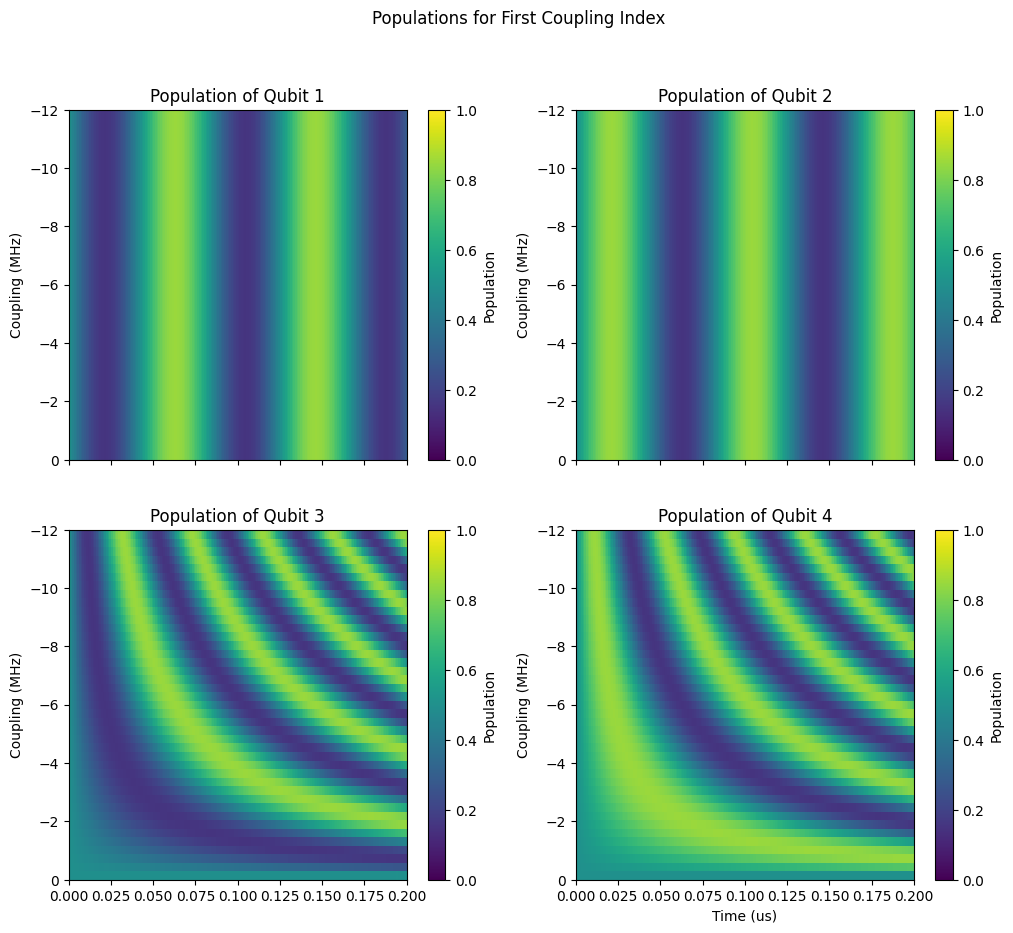

C:\Users\Matt\AppData\Local\Temp\ipykernel_15224\6237602.py:45: RuntimeWarning: divide by zero encountered in divide
  beamsplitter_time = 1/np.abs(couplings)


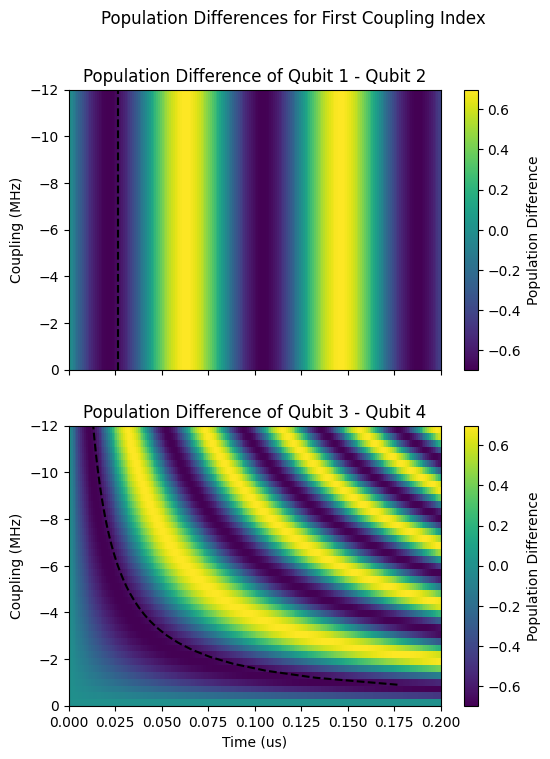

In [262]:
### plot the four populations in the first index of population_data as four colors plots on subplots 
fig, axs = plt.subplots(2, 2, figsize=(12, 10), sharex=True)
axs = axs.flatten()

colors = ['r', 'g', 'b', 'm']
labels = ['Qubit 1', 'Qubit 2', 'Qubit 3', 'Qubit 4']

for idx in range(4):
    im = axs[idx].imshow(population_data[idx, :, :], aspect='auto', interpolation='none',
                        extent=[times[0], times[-1], couplings[0]/2/np.pi, couplings[-1]/2/np.pi], origin='lower')
   
    axs[idx].set_ylabel(labels[idx])
    axs[idx].set_title(f'Population of {labels[idx]}')
    axs[idx].set_ylabel('Coupling (MHz)')
    fig.colorbar(im, ax=axs[idx], label='Population')
    im.set_clim(0,1)

# plt.plot(1/couplings, couplings/2/np.pi)

axs[-1].set_xlabel('Time (us)')
fig.suptitle('Populations for First Coupling Index')
# plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

population_differences = np.zeros((2, len(couplings), len(times)))
population_differences[0,:,:] = population_data[0,:,:] - population_data[1,:,:]
population_differences[1,:,:] = population_data[2,:,:] - population_data[3,:,:]

fig, axs = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
axs = axs.flatten()
labels = ['Qubit 1 - Qubit 2', 'Qubit 3 - Qubit 4']
for idx in range(2):
    im = axs[idx].imshow(population_differences[idx, :, :], aspect='auto', interpolation='none',
                        extent=[times[0], times[-1], couplings[0]/2/np.pi, couplings[-1]/2/np.pi], origin='lower')
   
    axs[idx].set_ylabel(labels[idx])
    axs[idx].set_title(f'Population Difference of {labels[idx]}')
    axs[idx].set_ylabel('Coupling (MHz)')
    fig.colorbar(im, ax=axs[idx], label='Population Difference')
    # im.set_clim(-1,1)

    if idx == 0:
        axs[idx].axvline(1/abs(measurement_J_list[0]), color='k', linestyle='--')
    elif idx == 1:
        beamsplitter_time = 1/np.abs(couplings)
        indices = np.where(beamsplitter_time < times[-1])
        axs[idx].plot(beamsplitter_time[indices], couplings[indices]/2/np.pi, color='k', linestyle='--')

axs[-1].set_xlabel('Time (us)')
fig.suptitle('Population Differences for First Coupling Index')
# plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

current_values = np.zeros((len(couplings), len(times)))
# beamsplitter_indices = np.where(1/np.abs(couplings)

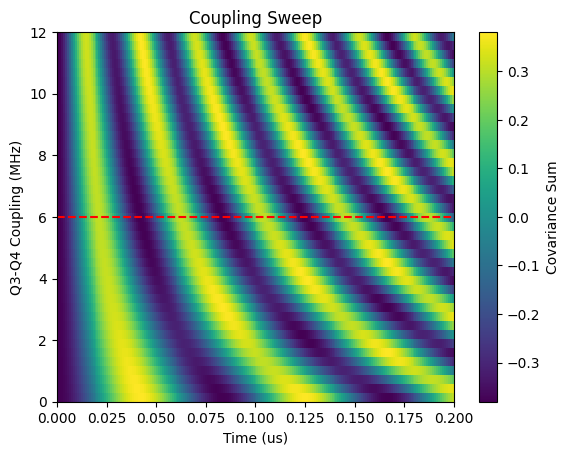

In [263]:
plt.imshow(correlation_data, interpolation='none',
           extent=(times[0], times[-1], abs(couplings[0])/2/np.pi, abs(couplings[-1])/2/np.pi), aspect='auto', origin='lower')

plt.axhline(abs(J[0])/2/np.pi, color='red', linestyle='--', label='J')

# plt.plot(2/(couplings+J[0]), couplings/2/np.pi, color='red', label=r'half period with effective coupling  $\frac{J_{12} + J_{34}}{2}$')


# plt.legend()

plt.colorbar(label='Covariance Sum')
plt.xlabel('Time (us)')
plt.ylabel('Q3-Q4 Coupling (MHz)')
plt.title('Coupling Sweep')
plt.show()

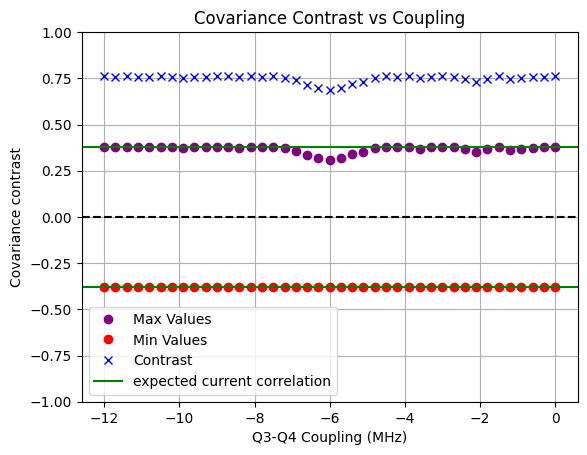

In [264]:
max_values = np.max(correlation_data, axis=1)
min_values = np.min(correlation_data, axis=1)
contrast_values = max_values - min_values

plt.plot(couplings/2/np.pi, max_values, 'o', color='purple', label='Max Values')
plt.plot(couplings/2/np.pi, min_values, 'o', color='red', label='Min Values')
plt.plot(couplings/2/np.pi, contrast_values, 'x', color='blue', label='Contrast')
plt.ylim(-1, 1)
plt.grid()
plt.axhline(0, color='black', linestyle='--')
plt.axhline(0.38, color='green', label='expected current correlation')
plt.axhline(-0.38, color='green')

plt.xlabel('Q3-Q4 Coupling (MHz)')
plt.ylabel('Covariance contrast')
plt.title('Covariance Contrast vs Coupling')
plt.legend()
plt.show()